## **Libraries**

In [21]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam
import datetime
from sklearn.metrics import confusion_matrix, classification_report
import itertools

## **Load Data and Preprocessing**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## type changing
x_train = x_train.astype('float64')
x_test  = x_test.astype('float64')

## normalize
x_train = x_train/255
x_test = x_test/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

## one-hot for output
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)
x_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

## **Create Model**

In [5]:
def model():
    model = Sequential()
    model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [6]:
mo = model()
mo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 256)         590080    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 256)       

In [8]:
mo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
begin = datetime.datetime.now()
history = mo.fit(x_train, y_train, epochs=12, batch_size=64, validation_split=0.2)
end = datetime.datetime.now()
Training_time = end - begin
print("\n\n\nTraining Time = {}".format(Training_time))

Epoch 1/12
750/750 [==============================] - 11s 13ms/step - loss: 0.1015 - accuracy: 0.7766 - val_loss: 0.0611 - val_accuracy: 0.8730
Epoch 2/12
750/750 [==============================] - 9s 12ms/step - loss: 0.0549 - accuracy: 0.8891 - val_loss: 0.0519 - val_accuracy: 0.8982
Epoch 3/12
750/750 [==============================] - 10s 13ms/step - loss: 0.0462 - accuracy: 0.9060 - val_loss: 0.0501 - val_accuracy: 0.8994
Epoch 4/12
750/750 [==============================] - 9s 12ms/step - loss: 0.0407 - accuracy: 0.9174 - val_loss: 0.0444 - val_accuracy: 0.9097
Epoch 5/12
750/750 [==============================] - 10s 13ms/step - loss: 0.0365 - accuracy: 0.9253 - val_loss: 0.0462 - val_accuracy: 0.9110
Epoch 6/12
750/750 [==============================] - 9s 13ms/step - loss: 0.0329 - accuracy: 0.9343 - val_loss: 0.0440 - val_accuracy: 0.9170
Epoch 7/12
750/750 [==============================] - 10s 13ms/step - loss: 0.0295 - accuracy: 0.9412 - val_loss: 0.0436 - val_accuracy: 0.

## **Train Model**

## **Evaluation**

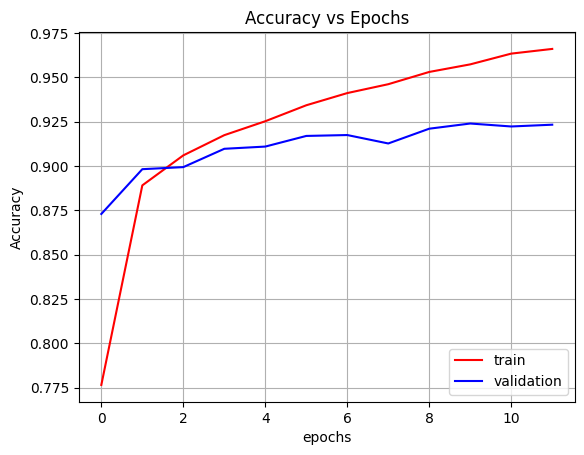

In [9]:
fig = plt.figure()
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

In [11]:
y_pred = mo.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = np_utils.to_categorical(y_pred)

[test_loss, test_accuracy] = mo.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test accuracy: ", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9181
Test Loss:  0.05428516864776611
Test accuracy:  0.9180999994277954


In [12]:
print(y_pred.shape)
print(y_test.shape)

(10000, 10)
(10000, 10)


In [13]:
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]

print("Classified correctly: ", len(correct_indices))
print("Classidied incorrectly: ", len(incorrect_indices))

Classified correctly:  98362
Classidied incorrectly:  1638
